## Astro 330 "Computational Astrophysics"


#### Monte Carlo forecasting of the 2016 election

<b>Tasks.</b> 
* <b>(a) (5 points)</b> Briefly explain the logic of using t-distribution (i.e., not what I say below, but why it describes the distribution in this case; read about it and think about why and how we apply it here.) Implement <i>your own</i> function that draws random samples from the Student t-distribution with input number of degrees of freedom. You can use any sampling method you choose, as long as you don't use any library routines except for special function routines and routines for generating uniformly distributed pseudo-random numbers. Try to use vector operations in this function as much as possible so it can generate sizeable sequences fast. Test your function against the corresponding numpy function: <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.standard_t.html">numpy.random.standard_t</a>. Plot the t-distribution for several representative numbers of degrees of freedom and compare them to the Gaussian pdf of zero mean and unit variance. If for some reason you will not be able to get your routine working, use the numpy standard_t routine for the following tasks. 

* <b>(b) (10 points).</b> Implement <i>the simplest election model:</i> 1) compute $\bar{p}$ and $s$ (the mean and standard deviation, see background info below) for each state using polls within specified range (this is already implemented in <tt>simulate_elections</tt> routine below); 2) make $N_{\rm elections}$ realizations of vote fraction for each candidate and for each state using numbers drawn from the t-distribution with the number of degrees of freedom equal to $N_{\rm polls}-1$. This will give distribution of votes among model elections for each candidate. For each model election record who is the winner and how many electoral delegates each candidate received in each model election. Almost all states are a "winner take all" with regards to Electoral College votes, so whoever wins the popular vote receives all Electoral College votes for that state. We will ignore the fact that in a couple of states the procedure is a bit more complicated, because the number of electoral votes at stake in them is small and so this neglection will be unlikely to skew the overall result. 

Report the following results from your model: 
1) histograms showing distributions of electoral vote counts for Clinton, Trump, and Johnson among model elections. Compare your distributions to the distribution predicted by Nate Silver's model, which you can find <a href="http://projects.fivethirtyeight.com/2016-election-forecast/">at 538 website</a> (under "What to expect from the Electoral College" heading). How similar or different they are? Comment on any differences that you notice and discuss their possible origin. You may find it helpful to review the <a href="http://fivethirtyeight.com/features/a-users-guide-to-fivethirtyeights-2016-general-election-forecast/">description of how they create these forecasts</a>.

Estimate the average electoral vote count for each candidate and 95\% range around it based on the model elections. In what percentage of the model elections does Hilary Clinton win the Presidency?  How about Donald Trump and Gary Johnson?

2) How different are the results of the "popular vote" (i.e. actual vote fractions won by candidates) and Electoral College vote counts for one of the two main-party candidates.  Make scatter plots of the expected Electoral College votes vs. the fraction of popular vote received for all of the elections, and put lines indicating 50\% of the popular vote as well as the needed 270 Electoral College votes.  Is it possible to win more than half of the Electoral College vote but get less than half of the popular votes, or vice versa?  Why might this be true?

3) table (printed out or saved in a file) with a list of states with average fraction of model elections won by one of the three candidates in model elections in each state along with the 95\% range of this fraction estimated using model elections. 
Optionally, you can also represent the average outcome of elections in each state in a map drawing each state red or blue (or green for Johnson) depending on which candidate won on average. You can use a <a href="http://matplotlib.org/examples/color/colormaps_reference.html">colormap</a> such as <tt>seismic</tt> to indicate with color hues how close or landslide the election was.

* <b>c. (10 points).</b> <i>A more realistic model?</i> The simple model described above assumes that poll results for each state are independent and are unbiased. Even a cursory knowledge of what's involved in these polls indicates that this is likely a very flawed assumption (see, e.g., <a href="http://www.nytimes.com/2016/10/13/upshot/the-savvy-persons-guide-to-reading-the-latest-polls.html">this New York Times story</a> from a year ago). The polls were shown to be biased in many states in the 2012 Presidential election and also during recent "Brexit" vote in the UK. The perceptions and voting patterns of populations in states that are similar culturally and demographically are probably also correlated. To a large extent these correlations should already be reflected in the poll results, but subtle biases creep in, like the fact that polls reach people in the inner cities less than populations in the rural areas. Once you think about the possible sources of bias and covariance, things quickly start to look complicated. However, we can stay with the spirit of the empirical basis of the model to estimate the biases and correlations using results of previous 2008 and 2012 presidential elections. 

I've included files <tt>2008-polls.csv, 2008-results.csv, 2012-polls.csv, 2012-results.csv</tt> which provide information about what polls predicted for each state in the last two elections and what the actual results were. The data is only for the two main candidates from Republican (McCain and Romney) and Democratic parties (Obama in both elections). To estimate the bias we can subtract results from poll predictions for both republicans and democrats, and average results for the two parties separately among two elections. This average gives us the poll bias estimate for each party and each state. We can also compute the <a href="http://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm">correlation matrix</a> for this average, which encodes correlations of the biases and poll errors among states. The data for this calculation is prepared in the routine <tt>compute_state_correlation_matrix</tt> below. 

With the bias vectors and correlation matrices, we can construct a more sophisticated model, in which the random realizations of vote fractions for Clinton and Trump for each state will be turned into biased and correlated random realizations. The bias is produced by simply adding the bias value for each state and estimated for each of the two party to each random realization of vote fraction for the candidate of that party. Correlations in the bias among states will be enforced by turning random numbers into correlated random numbers. 

This can be done using the <a href="http://www.numericalexpert.com/blog/correlated_random_variables/">method based on the Cholesky matrix decomposition,</a> (see also <a href="https://www.sitmo.com/?p=720">here</a>) which is outlined in the S 2.3 of the notes. I will not be covering matrix algebra algorithms in this course, due to lack of time and also because I think there is limited amount of useful information that can be learned from the algorithms themselves (there are various useful thing to know about <i>usage</i> of matrix algebra and associated numerical issues, however). So, here you can use the numpy routine performing Cholesky decomposition: <a href="https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.cholesky.html"><tt>numpy.linalg.cholesky</tt></a>.

Implement the model with induced bias and correlation on the random numbers drawn from t-distribution. Repeat the same predictions listed in the part b above. What difference do you see? Interpret any difference or lack thereof. 

<b>Background.</b> I told you about Enrico Fermi making experiment predictions using Monte Carlo sampling circa 1932 and impressing the hell out of his colleagues. Enrico Fermi also was famous for making simple but very meaningful estimates of all kinds of things (e.g., probability that an alien civilization would colonize the solar system, which led to his realization known now as the <a href="https://en.wikipedia.org/wiki/Fermi_paradox">Fermi paradox</a>). Thus, our training of ability to estimate and model things in science can be generally applicable to all kinds of phenomena around us. Hence, this last exercise is not about astrophysics, but about applying a Monte Carlo simulation method, used routinely in physics to model and forecast performance of experimental apparata, properties of physical systems (e.g., using Monte Carlo to simulate radiative transfer), etc., to forecast the outcome of 2016 Presidential election that will take place in two weeks. By completing this exercise next week you will make a prediction that will be tested a few days later. Although there are more than three candidates running, most of the other candidates are not registered in most states and polling data for them is sparse (although it is still present in the 538 table). We will thus focus on the two front-running candidates from the Democratic and Republican parties: [Hillary Clinton][4] and [Donald Trump][5], and the main third-party candidate: [Gary Johnson][6]

The Monte Carlo model we will be using is qualitatively similar to those used at election prediction sites such as [FiveThirtyEight][1] run by Nate Silver, who became famous for successfully predicting outcome of 2008 and 2012 presidential elections for each state (as an aside, Nate Silver is <a href="http://fivethirtyeight.com/sports/">currently predicting</a> 62% probability that Cubs will win the World Series; we will discuss whether there is a way to interpret this number as "prediction" after we do this homework). The reason for constructing a different model is that despite the detailed description, we don't know the specific details of Nate Silver's algorithm; we know enough to understand the logic and construct a similar model though. This also gives us the opportunity to critically think about the reasonable model assumptions and choices on our own. In this regard, if you have good suggestions for how to improve/change model calculations outlined below, you are welcome to present calculations of your own model. However, I ask you to do so only after presenting the calculation for the model outlined below for the ease of comparison of results. 

Below you will find a code snippet that reads a CSV (comma-separated value) file from the <a href="http://projects.fivethirtyeight.com/2016-election-forecast/">538 website</a> (see link at the bottom of the page) containing information about each of the 50 states as well as the District of Columbia, and you'll use this to make election predictions.
It also contains national polls, but we will ignore these as we will concentrate on predictions for each state individually and thus will use state specific polling data.  This information includes: the state name and abbreviation, the state's polls by various organizations that present percentages of people who said they will vote for one of the presidential candidates, margin of error of the poll, weights assigned to each poll, the number of people surveyed in the last poll, etc.  For each candidate, the number corresponds to the percentage of the voting population that intends to vote for them according to the polls, as well as the margin of error of the poll. 

The code also includes reading of another table that contains the number of electoral votes for each state. 

**A quick info on the US presidential election rules:** The United States does not directly elect the President and Vice President of the United States.  Instead, "Electors" are apportioned to each state based on its population according to the most recent [U.S. census][3] results (equal to the number of members of Congress to which that state receives).  Electors are typically required to vote for the candidate with the majority of the popular vote in their state.  At the moment, there are 538 Electors in the ["Electoral College"][2], and to win the presidency a candidate needs to recieve half plus one of those votes, or 270 votes.

[1]: http://fivethirtyeight.com/
[2]: https://en.wikipedia.org/wiki/Electoral_College_(United_States)
[3]: https://www.census.gov/
[4]: https://www.hillaryclinton.com/
[5]: https://www.donaldjtrump.com/
[6]: https://www.johnsonweld.com/
[7]: https://en.wikipedia.org/wiki/Normal_distribution

#### The Model and exercise instructions

The task is to build a model using Monte Carlo method to predict not just who will win the election state-by-state and nationwide, but what the range of likely outcomes will be (we call this posterior distribution in science). 

The model will use weighted average and standard deviation of the different polls existing for each state within a specified range of dates to compute the mean percentages of people that will vote for Hillary Clinton, Donald Trump, or Gary Johnson. 
The latest state-by-state poll results  <a href="http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv">downloaded</a> from the <a href="http://projects.fivethirtyeight.com/2016-election-forecast/">538</a> website, are stored in the file <tt>data_home_dir()+'president_general_polls_2016.csv'</tt>. The code snippet below shows how to read it (using pandas library) and how to access the poll data in the table. You can see the names of the columns in the table, either by printing poll_data or by looking at the csv file directly with a spreadsheet application such as Excel. I show you how to access and extract relevant info in the function <tt>simulate_elections</tt> - which is proto-function that you will need to complete with the code implementing actual model.. 

If you look at the data I am extracting, you may notice that I extract poll results and weights for each poll, assigned by 538 to each poll, based on the <a href="http://projects.fivethirtyeight.com/pollster-ratings/">track record</a> of particular polling organization that did it. However, you may notice that I am <i>not</i> extracting poll's sampling error associated with it. This error is largely determined by the typical size of the poll ($\sim 10^3-10^4$ people, corresponding to a typical error of $\sim 1-3$%). However, we don't know how it was estimated or whether it is accurate and also we don't know whether the underlying distribution is Gaussian.  

In this situation, we can get a more reliable estimate of the polling error from the sample of state polls itself using <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution">Student's t-distribution</a>. Namely, for each state we can estimate the weighted average of $N$ poll results, and their standard deviation. Random numbers, $t$, drawn from the t-distribution with $N-1$ degrees of freedom, then will give  
us distribution of actual vote fractions for each candidate: $v = \bar{p} - ts$, where 
$$\bar{p}=\frac{\sum_i^{N_{\rm polls}} p_i w_i}{\sum_i^{N_{\rm polls}} w_i},$$
is the weighted average of the $N_{\rm polls}$ poll results for the state and $s$ is the standard deviation of $p_i$. The t-distribution becomes very similar to Gaussian pdf for samples of size $N_{\rm polls} >10$, but for small $N_{\rm polls}$ it has much stronger ("fatter") tails than the Gaussian. This makes outlier events considerably more likely. The most recent polls are probably the most accurate in predicting the election outcome, but as we restrict the date range the number of polls drops and this needs to be reflected in the proper modelling of vote fraction distribution (which is done by using t-distribution instead of the Gaussian with estimated sample mean and standard deviation). 

With this information in hand, carry out the tasks formulated above. 





The latest state-by-state poll results  <a href="http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv">downloaded</a> from the <a href="http://projects.fivethirtyeight.com/2016-election-forecast/">538</a> website, are stored in the file <tt>data_home_dir()+'president_general_polls_2016.csv'</tt>. The code snippet below shows how to read it (using pandas library) and how to access the poll data in the table. You can see the names of the columns in the table, either by printing poll_data or by looking at the csv file directly with a spreadsheet application. 

In [238]:
import numpy as np
from codes.setup import data_home_dir
import pandas 

poll_data = pandas.read_csv(data_home_dir()+'president_general_polls_2016.csv')
states_electoral = pandas.read_csv(data_home_dir()+'states_electoral.csv')

In [239]:
# example of prints showing how to access data frame data 
Nprint = 2
# print poll region (state name or nation wide, if field=U.S.) for the first Nprint entries 
print poll_data['state'][:Nprint]
# grade of the poll for the first Nprint entries 
print poll_data['enddate'][:Nprint]

print states_electoral['State'][:Nprint], states_electoral['State'].size

0    U.S.
1    U.S.
Name: state, dtype: object
0    11/3/2016
1    11/3/2016
Name: enddate, dtype: object
0    AK
1    AL
Name: State, dtype: object 51


In [252]:
from sklearn.covariance import shrunk_covariance, ledoit_wolf, oas

def compute_state_covariance_matrix(states_electoral):
    """
    compute bias vectors and covariance matrix using 2008 and 2012 election results 
    """
    states      = states_electoral['State']
    state_names = states_electoral['Name']
    nstates     = states.size

    dem_results = np.zeros(nstates); rep_results = np.zeros(nstates);
    dem_polls = np.zeros((nstates,2)); rep_polls = np.zeros((nstates,2));
    for i, yr in enumerate([2008, 2012]):
        # the lines below show you how to read and extract poll and election results of 2008 and 2012 Presidential elections
        prev_election_results = pandas.read_csv(data_home_dir()+str(yr)+'-results.csv')
        dem_results += np.array(prev_election_results['Dem'])
        rep_results += np.array(prev_election_results['Rep'])
        prev_poll_results = pandas.read_csv(data_home_dir()+str(yr)+'-polls.csv')
        # average out poll results for each state
        for ist, st in enumerate(states):
            stpolls = prev_poll_results[prev_poll_results['State'] == st]
            dem_polls[ist,i] = np.mean(np.array(stpolls['Dem']))
            rep_polls[ist,i] = np.mean(np.array(stpolls['Rep']))
    
    dem_results *= 0.5; rep_results *= 0.5
    dem_polls_ave = 0.5*(dem_polls[:,0] + dem_polls[:,1])
    rep_polls_ave = 0.5*(rep_polls[:,0] + rep_polls[:,1])
    bias_dem = dem_results - dem_polls_ave
    bias_rep = rep_results - rep_polls_ave
    dem_polls[:,0] -= dem_polls_ave; dem_polls[:,1] -= dem_polls_ave
    rep_polls[:,0] -= rep_polls_ave; rep_polls[:,1] -= rep_polls_ave
    cov_dem = np.cov(dem_polls); cov_rep = np.cov(rep_polls)
    
    #cov_dem_my = np.zeros_like(cov_dem)
    #for i in range(nstates):
    #    for j in range(nstates):
    #        cov_dem_my[i,j] = (dem_polls[i,0]*dem_polls[j,0] + dem_polls[i,1]*dem_polls[j,1])
    # regularize empirical covariance matrix estimate
    #shrinkage = 1.e-14 # small shrinkage parameter to make cov matrix positive semi-definite
    #cov_dem = shrunk_covariance(cov_dem, shrinkage = shrinkage)
    #cov_rep = shrunk_covariance(cov_dem, shrinkage = shrinkage)
    #cov_dem, shr_dem = ledoit_wolf(cov_dem)
    #cov_rep, shr_rep = ledoit_wolf(cov_rep)
    cov_dem, shr_dem = oas(cov_dem)
    cov_rep, shr_rep = oas(cov_rep)
    #print "shrinkages:", shr_dem, shr_rep
    # make sure that matrices are positive definite
    if not np.all(np.linalg.eigvals(cov_dem) > 0):
        raise Exception("cov_dem is not positive definite, try increasing shrinkage parameter")
    if not np.all(np.linalg.eigvals(cov_rep) > 0):
        raise Exception("cov_rep is not positive definite, try increasing shrinkage parameter")
        
    return bias_dem, cov_dem, bias_rep, cov_rep

In [253]:
bias_dem, cov_dem, bias_rep, cov_rep = compute_state_covariance_matrix(states_electoral)

def print_matrix(a):
    print "Matrix["+("%d" %a.shape[0])+"]["+("%d" %a.shape[1])+"]"
    rows = a.shape[0]; cols = a.shape[1]
    for i in range(0, rows):
        for j in range(0, cols):
            print("%5.2f" %a[i,j]),
    print    

#print print_matrix(cov_dem)
#print print_matrix(cov_dem_my)

Ldem = np.linalg.cholesky(cov_dem)
Lrep = np.linalg.cholesky(cov_rep)

In [372]:
from numpy.random import standard_t as tdist

def simulate_elections(poll_data, states_electoral, date_range, poll_type, correlations = False, nsims = 10, **kwargs):
    
    states = states_electoral['State']
    state_names = states_electoral['Name']
    electors = states_electoral['Electors']
    nstates = states.size

    dates = pandas.to_datetime(poll_data['startdate'])

    ave_clinton, std_clinton, n_clinton = np.zeros(nstates), np.zeros(nstates), np.zeros(nstates, dtype=np.int); 
    ave_trump,   std_trump,   n_trump   = np.zeros(nstates), np.zeros(nstates), np.zeros(nstates, dtype=np.int); 
    ave_johnson, std_johnson, n_johnson = np.zeros(nstates), np.zeros(nstates), np.zeros(nstates, dtype=np.int);
    clinton_vote_dist = np.zeros((nstates,nsims))
    trump_vote_dist   = np.zeros((nstates,nsims))
    johnson_vote_dist = np.zeros((nstates,nsims))
    clinton_electoral_votes = np.zeros(nsims)
    trump_electoral_votes   = np.zeros(nsims)
    johnson_electoral_votes = np.zeros(nsims)
    
    if correlations:
        bias_dem = kwargs["bias_dem"]; bias_rep = kwargs["bias_rep"]
        cov_dem = kwargs["cov_dem"];   cov_rep = kwargs["cov_rep"]
        Ldem = np.linalg.cholesky(cov_dem); Lrep = np.linalg.cholesky(cov_rep)
        
    ndraws = 0 
    for i, state in enumerate(state_names):
        poll_state = poll_data[(poll_data['state'] == state) & (dates > date_range[0]) & (dates < date_range[1])]
        poll_weights = poll_state['poll_wt']
        trump_polls   = poll_state[poll_type+'_trump']
        clinton_polls = poll_state[poll_type+'_clinton']
        johnson_polls = np.nan_to_num(poll_state[poll_type+'_johnson'])

        ave_clinton[i], std_clinton[i],  n_clinton[i] = np.average(clinton_polls, weights=poll_weights), np.std(clinton_polls, ddof=1), clinton_polls.size 
        ave_trump[i],   std_trump[i],   n_trump[i]   = np.average(trump_polls, weights=poll_weights),   np.std(trump_polls, ddof=1),   trump_polls.size 
        ave_johnson[i], std_johnson[i], n_johnson[i] = np.average(johnson_polls, weights=poll_weights), np.std(johnson_polls, ddof=1), johnson_polls.size 

        johnson_votes = ave_johnson[i] - std_johnson[i] * tdist(n_johnson[i]-1, size=nsims)
        if not correlations: 
            clinton_votes = ave_clinton[i] - std_clinton[i] * tdist(n_clinton[i]-1, size=nsims)
            trump_votes   = ave_trump[i]   - std_trump[i]   * tdist(n_trump[i]-1,   size=nsims)
            draws = (johnson_votes == trump_votes) | (johnson_votes == clinton_votes) | (trump_votes == clinton_votes)
            clinton_wins = ((clinton_votes[:]>trump_votes[:]) & (clinton_votes[:]>johnson_votes[:]))
            trump_wins   = (trump_votes[:]>clinton_votes[:]) & (trump_votes[:]>johnson_votes[:])
            johnson_wins = ((johnson_votes[:]>clinton_votes[:]) & (johnson_votes[:]>trump_votes[:]))
            clinton_electoral_votes[clinton_wins] += electors[i]
            clinton_electoral_votes[draws]        += electors[i] # assume all draws go to Clinton
            trump_electoral_votes[trump_wins]     += electors[i]
            johnson_electoral_votes[johnson_wins] += electors[i]
            #print i, state, clinton_electoral_votes, trump_electoral_votes, clinton_votes, trump_votes, ave_johnson[i], clinton_wins, johnson_wins
            ndraws += len(np.where(draws>0))
            clinton_vote_dist[i,:] = clinton_votes
            trump_vote_dist[i,:] = trump_votes

        else:
            clinton_vote_dist[i,:] = tdist(n_clinton[i]-1, size=nsims)
            trump_vote_dist[i,:] = tdist(n_trump[i]-1, size=nsims)
            # no correlation data for 3rd party, so leave as is

    if correlations:
        for i in range(nsims):
            clinton_vote_dist[:,i] = ave_clinton  - std_clinton*np.dot(Ldem,  clinton_vote_dist[:,i]) + bias_dem
            trump_vote_dist[:,i]   = ave_trump    - std_trump*np.dot(Lrep,  trump_vote_dist[:,i]) + bias_rep
        for i in range(nstates):
            johnson_votes = ave_johnson[i] - std_johnson[i] * tdist(n_johnson[i]-1, size=nsims)
            clinton_votes, trump_votes = clinton_vote_dist[i,:], trump_vote_dist[i,:]
            draws = (johnson_votes == trump_votes) | (johnson_votes == clinton_votes) | (trump_votes == clinton_votes)
        
            clinton_electoral_votes[(clinton_votes[:]>trump_votes[:]) & (clinton_votes[:]>johnson_votes[:])] += electors[i]
            clinton_electoral_votes[draws] += electors[i] # assume all draws go to Clinton
            trump_electoral_votes[(trump_votes[:]>clinton_votes[:]) & (trump_votes[:]>johnson_votes[:])]     += electors[i]
            johnson_electoral_votes[(johnson_votes[:]>clinton_votes[:]) & (johnson_votes[:]>trump_votes[:])] += electors[i]
        
            ndraws += len(np.where(draws>0))

    print "detected total %d draws"%ndraws
    return clinton_electoral_votes, trump_electoral_votes, johnson_electoral_votes, ndraws, clinton_vote_dist, trump_vote_dist
        

#### Simplest model

First, predictions of the simplest model where state polls are assumed to be independent and unbiased. 

Results below indicate that state-by-state predictions of Clinton/Trump win probabilities of this model are closest to the corresponding <a href="http://projects.fivethirtyeight.com/2016-election-forecast/">state-by-state predictions</a> of the 538 website among the considered models. Notable discrepancies of the simple model with 538 predictions are Florida (52% for Trump), North Carolina (52% for Trump), as of Nov 5, 2016.

The good agreement of the simple model with 538 predictions for individual states suggests that the latter do not account for covariances between poll errors and biases in computing probabilities of the outcome. This means that their probabilities are too "polarized" and results for quite a few states for which they predict low probability for one of the candidates have a good chance to actually go to the other candidate, if the neglected covariances and biases are strong.  

In [395]:
poll_type = 'rawpoll'
date_range = ['10-20-2016', '11-04-2016']
nsims = 20000
kwargs = {}
clinton_electoral_votes, trump_electoral_votes, johnson_electoral_votes, ndraws, clinton_vote_dist, trump_vote_dist = simulate_elections(poll_data, states_electoral, 
                                                                                             date_range, poll_type, nsims = nsims, **kwargs)


detected total 51 draws
[ 276.  329.  294. ...,  293.  304.  313.]
[ 262.  209.  244. ...,  245.  234.  225.]
[ 0.  0.  0. ...,  0.  0.  0.]


In [396]:
print 1.*len(trump_electoral_votes[trump_electoral_votes>clinton_electoral_votes])/nsims
print np.mean(trump_electoral_votes), np.mean(clinton_electoral_votes)


0.06045
231.76345 306.23565


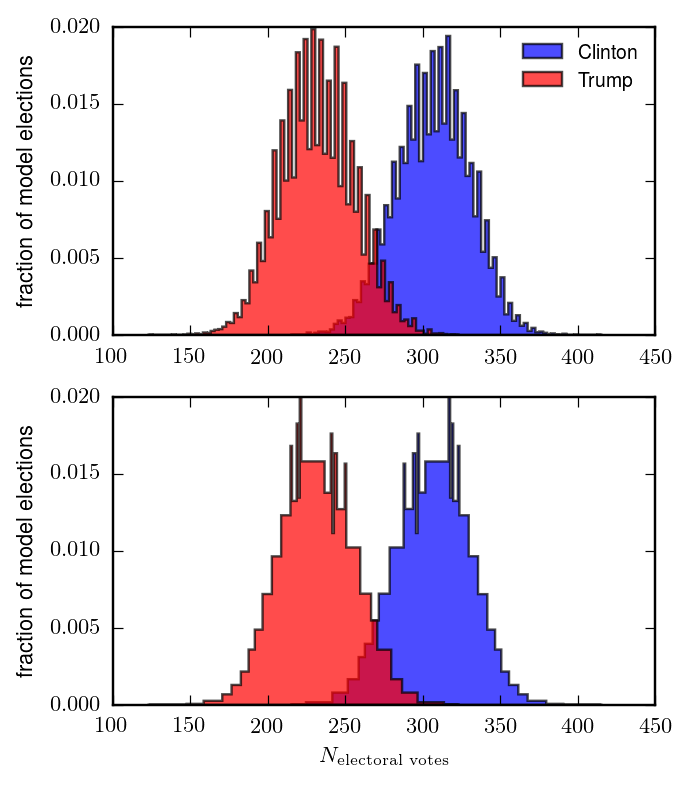

In [397]:
plot_electoral_vote_distribution(clinton_electoral_votes, trump_electoral_votes)

============ State-by-state vote predictions ==============
               State   Clinton win prob.  Trump win probability
 
              Alaska        0.34           0.66
             Alabama        0.00           1.00
            Arkansas        0.01           0.99
             Arizona        0.28           0.72
          California        1.00           0.00
            Colorado        0.79           0.21
         Connecticut        0.99           0.01
District of Columbia        1.00           0.00
            Delaware        0.99           0.01
             Florida        0.61           0.39
             Georgia        0.16           0.84
              Hawaii        1.00           0.00
                Iowa        0.23           0.77
               Idaho        0.00           1.00
            Illinois        0.99           0.01
             Indiana        0.02           0.98
              Kansas        0.06           0.94
            Kentucky        0.01           0.99
          

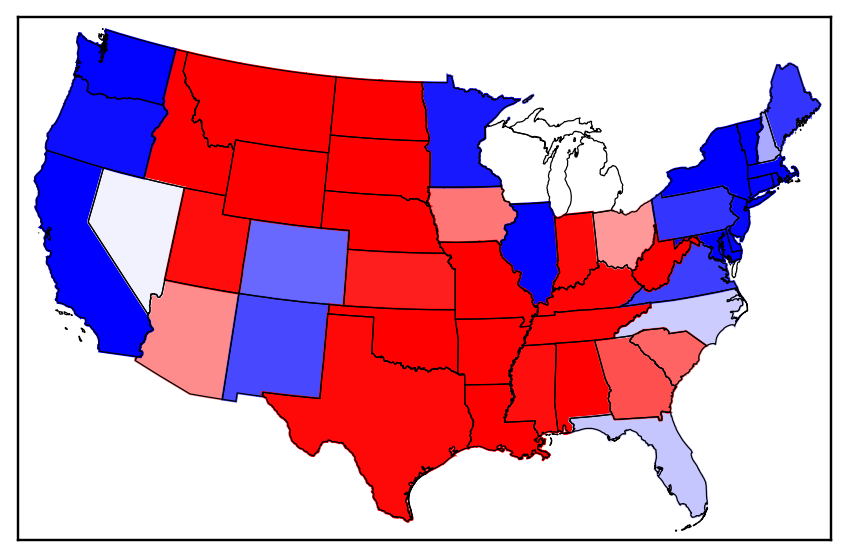

In [398]:
plot_map(nsims, clinton_vote_dist, trump_vote_dist)

#### Model with poll covariances, but no poll bias

Now predictions of the model, in which estimate of covariance of poll results between states is taken into account when generating model realizations of state by state elections. Polls still are considered to be unbiased here.

The application of covariances make predictions for individual states much less polarized. For example, Trump's probability of winning Alaska decreases from 66% to 51%, in Arkansas probability of Clinton win increases from 1% to 40%, in Illinois Trump's win probability increases from ~1% to 33%, etc. This is because, in our estimate of covariance based on polls in 2008 and 2012 elections, the variance of polls election to election was considerably larger than the variance of polls for a single election. This variance, as well as covariance between states, which is generally larger than the variance within state, broad distribution of election outcomes in each states thereby predicting less polarized win probabilities for Clinton and Trump. 

Below is a visualization of our estimate of the covariance matrix of polls. We can see that 1) cross-state covariance is generally larger than state variance and 2) generally, the variance for one state is not much larger than covariance between states, except for a few states, 3) covariance for democrats is considerably larger than for republicans.

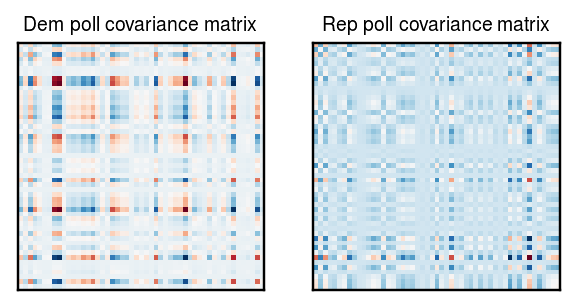

In [413]:
from matplotlib import pylab as plt
_, ax = plt.subplots(1, 2, figsize=(4.,8.))
ax[0].imshow(cov_dem, interpolation='nearest', #vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Dem poll covariance matrix', fontsize=8)

ax[1].imshow(cov_rep, interpolation='nearest', #vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title('Rep poll covariance matrix', fontsize=8)

plt.show()

In [403]:
nsims = 20000

bias_zero = np.zeros_like(bias_dem)
#kwargs = {"bias_dem": bias_dem, "cov_dem": cov_dem, "bias_rep": bias_rep, "cov_rep": cov_rep}
kwargs = {"bias_dem": bias_zero, "cov_dem": cov_dem, "bias_rep": bias_zero, "cov_rep": cov_rep}
clinton_electoral_votes, trump_electoral_votes, johnson_electoral_votes, ndraws, clinton_vote_dist, trump_vote_dist = simulate_elections(poll_data, states_electoral, 
                                                                                             date_range, poll_type, correlations=True, nsims = nsims, **kwargs)



detected total 51 draws


In [404]:
print 1.*len(trump_electoral_votes[trump_electoral_votes>clinton_electoral_votes])/nsims
print np.mean(trump_electoral_votes), np.mean(clinton_electoral_votes)

0.1918
228.48115 308.37385


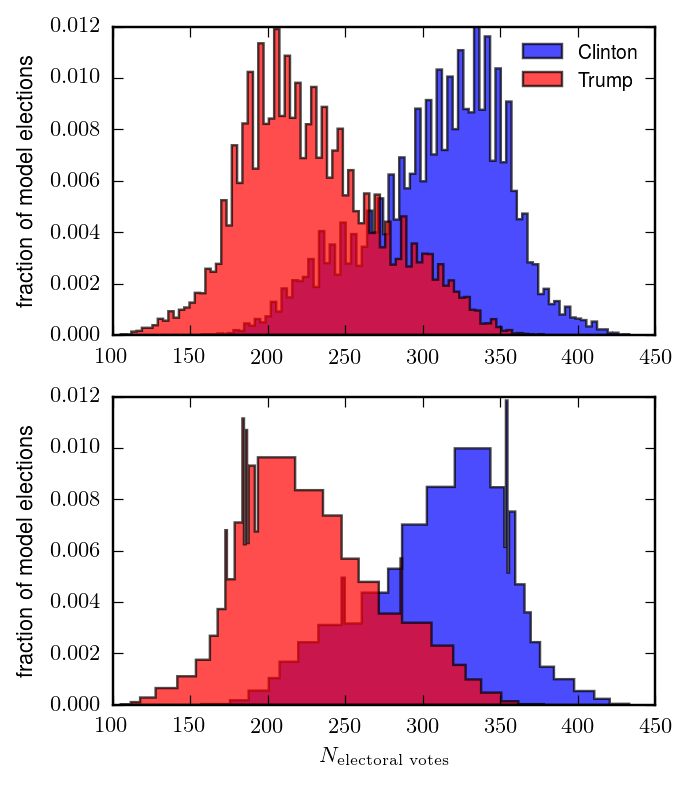

In [405]:
plot_electoral_vote_distribution(clinton_electoral_votes, trump_electoral_votes)

============ State-by-state vote predictions ==============
               State   Clinton win prob.  Trump win probability
 
              Alaska        0.49           0.51
             Alabama        0.14           0.86
            Arkansas        0.40           0.60
             Arizona        0.43           0.57
          California        0.96           0.04
            Colorado        0.61           0.39
         Connecticut        0.71           0.29
District of Columbia        0.70           0.30
            Delaware        0.61           0.39
             Florida        0.57           0.43
             Georgia        0.34           0.66
              Hawaii        0.94           0.06
                Iowa        0.47           0.53
               Idaho        0.22           0.78
            Illinois        0.67           0.33
             Indiana        0.37           0.63
              Kansas        0.37           0.63
            Kentucky        0.27           0.73
          

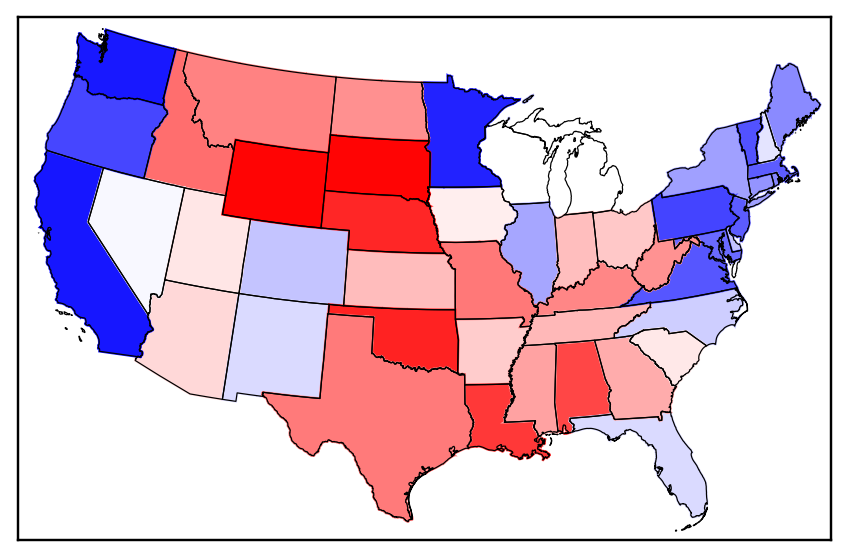

In [406]:
plot_map(nsims, clinton_vote_dist, trump_vote_dist)

#### Model with covariances and poll bias estimated from results and polls of 2008 and 2012 elections

This is the full model. Biases change results significantly for some states: e.g., Nevada, Florida etc. It's not clear whether this estimate of the bias is reasonable. The bias in 2008 and 2012 can be different in those elections (which involved african american candidate) and in this election (involving a female candidate), but there are reasons to think that they may be similar. 

The estimated bias apparently favors democrates as it increases the probabilities of Clinton win in many states (e.g., by 20% in Michigan). 

In [391]:
nsims = 20000

#bias_zero = np.zeros_like(bias_dem)
kwargs = {"bias_dem": bias_dem, "cov_dem": cov_dem, "bias_rep": bias_rep, "cov_rep": cov_rep}
clinton_electoral_votes, trump_electoral_votes, johnson_electoral_votes, ndraws, clinton_vote_dist, trump_vote_dist = simulate_elections(poll_data, states_electoral, 
                                                                                             date_range, poll_type, correlations=True, nsims = nsims, **kwargs)



detected total 51 draws


In [392]:
print 1.*len(trump_electoral_votes[trump_electoral_votes>clinton_electoral_votes])/nsims
print np.mean(trump_electoral_votes), np.mean(clinton_electoral_votes)

0.0897
209.466 327.6212


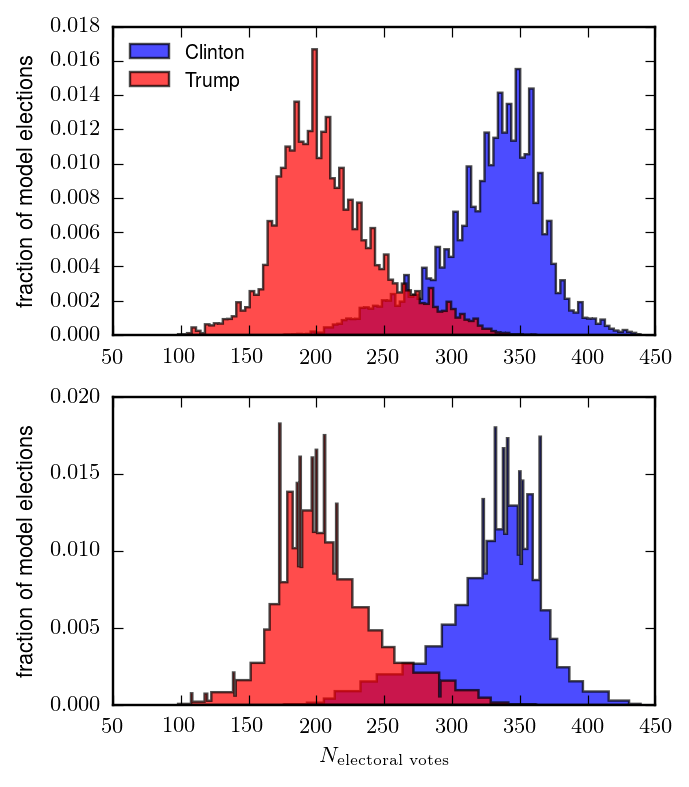

In [393]:
plot_electoral_vote_distribution(clinton_electoral_votes, trump_electoral_votes)

============ State-by-state vote predictions ==============
               State   Clinton win prob.  Trump win probability
 
              Alaska        0.48           0.52
             Alabama        0.11           0.89
            Arkansas        0.39           0.61
             Arizona        0.39           0.61
          California        0.98           0.02
            Colorado        0.73           0.27
         Connecticut        0.81           0.19
District of Columbia        0.73           0.27
            Delaware        0.62           0.38
             Florida        0.70           0.30
             Georgia        0.45           0.55
              Hawaii        0.99           0.01
                Iowa        0.48           0.52
               Idaho        0.26           0.74
            Illinois        0.69           0.31
             Indiana        0.39           0.61
              Kansas        0.36           0.64
            Kentucky        0.23           0.77
          

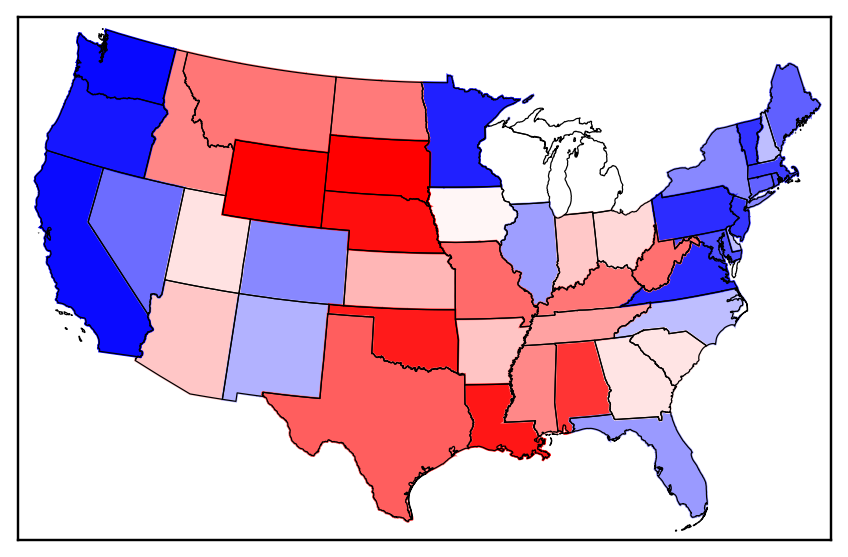

In [394]:
plot_map(nsims, clinton_vote_dist, trump_vote_dist)

In [385]:
%matplotlib inline
from matplotlib import pylab as plt
from codes.plot_utils import plot_pretty
from codes import bayesian_blocks

def plot_electoral_vote_distribution(clinton_electoral_votes, trump_electoral_votes, savefig=None):
    plot_pretty()
    _, ax = plt.subplots(2, 1, figsize=(4,5))
    #ax[0].set_xlabel(r'$N_{\rm electoral\ votes}$')
    ax[0].set_ylabel(r'fraction of model elections')
    ax[0].hist(clinton_electoral_votes, color='b', histtype='stepfilled', alpha=0.7, bins=80, label=r'Clinton', normed='True')
    ax[0].hist(trump_electoral_votes,color='r', histtype='stepfilled', alpha=0.7, bins=80, label=r'Trump', normed='True')
    #plt.hist(johnson_electoral_votes,color='g', histtype='stepfilled', alpha=0.7)
    ax[0].legend(loc='best', frameon=False, fontsize=8)

    bins_clinton = bayesian_blocks.bayesian_blocks(clinton_electoral_votes)
    ax[1].set_xlabel(r'$N_{\rm electoral\ votes}$')
    ax[1].set_ylabel(r'fraction of model elections')
    ax[1].hist(clinton_electoral_votes, bins=bins_clinton, color='b', alpha=0.7, histtype='stepfilled', normed='True')
    bins_trump = bayesian_blocks.bayesian_blocks(trump_electoral_votes)
    ax[1].hist(trump_electoral_votes, bins=bins_trump, color='r', alpha=0.7, histtype='stepfilled', normed='True')

    if savefig != None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()

In [365]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm as cm
import matplotlib.colors as colors


def plot_map(nsims, clinton_vote_dist, trump_vote_dist):
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile(data_home_dir()+'st99_d00', name='states', drawbounds=True)

    # collect the state names from the shapefile attributes so we can
    # look up the shape obect for a state by it's name
    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])

    ax = plt.gca() # get current axes instance

    cmap = plt.cm.bwr

    states = states_electoral['Name']
    nc = np.zeros(51); colors = np.zeros((51,4))
    print "============ State-by-state vote predictions =============="
    print "               State   Clinton win prob.  Trump win probability"
    print " "
    for i, ncd in enumerate(nc): 
        vote_ratio_trump = 1.*len(trump_vote_dist[i,trump_vote_dist[i,:]>clinton_vote_dist[i,:]])/nsims
        vote_ratio_clinton = 1.*len(clinton_vote_dist[i,clinton_vote_dist[i,:]>trump_vote_dist[i,:]])/nsims
        print "%20s        %.2f           %.2f"%(states[i], vote_ratio_clinton, vote_ratio_trump)
        colors[i] = cmap(vote_ratio_trump)

    for i, state in enumerate(states):
        # get state and draw the filled polygon
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor=colors[i], edgecolor=colors[i])
        ax.add_patch(poly)

    plt.show()